### Import Libraries

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

### Beta Distribution with different shape parameters

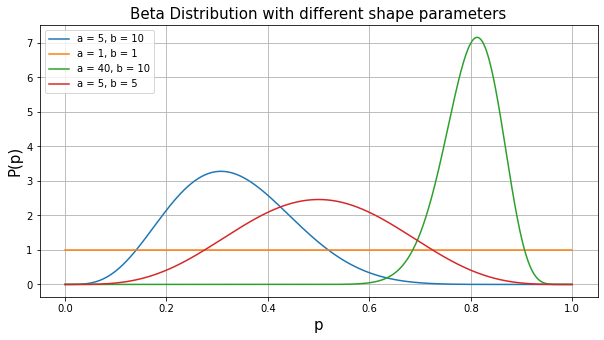

In [2]:
# Set the shape paremeters
params = [(5, 10), (1, 1), (40, 10), (5, 5)]

legend = []
x = np.linspace(0, 1, 1000)

# Plot the beta distribution
plt.figure(figsize=(10, 5))
# plt.xlim(0, 1)

for a, b in params:
    plt.plot(x, st.beta.pdf(x, a, b))
    legend.append('a = {}, b = {}'.format(a,b))
    
plt.legend(legend)
plt.title('Beta Distribution with different shape parameters', fontsize='15')
plt.xlabel('p', fontsize='15')
plt.ylabel('P(p)', fontsize='15')
plt.grid(True)
plt.show()

### Metropolis Hasting for sampling from posterior distribution

In [3]:
def next_proposed_value(theta):
    
    #Random walk
    return theta + st.norm(0, 0.1).rvs()

def acceptance_ratio(theta_old, theta_proposed, n, x, a, b):
    
    if not 0 <= theta_proposed <= 1:
        
        return 0
    
    numerator = st.binom(n, theta_proposed).pmf(x)*st.beta(a, b).pdf(theta_proposed)
    denominator = st.binom(n, theta_old).pmf(x)*st.beta(a, b).pdf(theta_old)
        
    ratio = min(1, numerator/denominator)
    
    return ratio

def isAccepted(p):
    
    unif = random.uniform(0,1)
    
    if unif > p:
        return False
    else:
        return True
    
def MCMC_samples(binom_n, n_success, beta_a, beta_b, n_iters = 10000, burn_in = 0):
    
    theta_init = np.random.choice([i/10 for i in range(11)])
    samples = [theta_init]
    
    for i in range(n_iters):
        
        theta_proposed = next_proposed_value(samples[-1])
        #print(theta_proposed)
        acc_ratio = acceptance_ratio(samples[-1], theta_proposed, binom_n, n_success, beta_a, beta_b)
        #print(acc_ratio)
        
        if isAccepted(acc_ratio):
            
            samples.append(theta_proposed)
        
        else:
            
            samples.append(samples[-1])
    
    return samples[burn_in:]

In [4]:
samples = MCMC_samples(binom_n = 1000, n_success = 689, beta_a  = 5, beta_b = 10, n_iters = 50000)

### Visualization

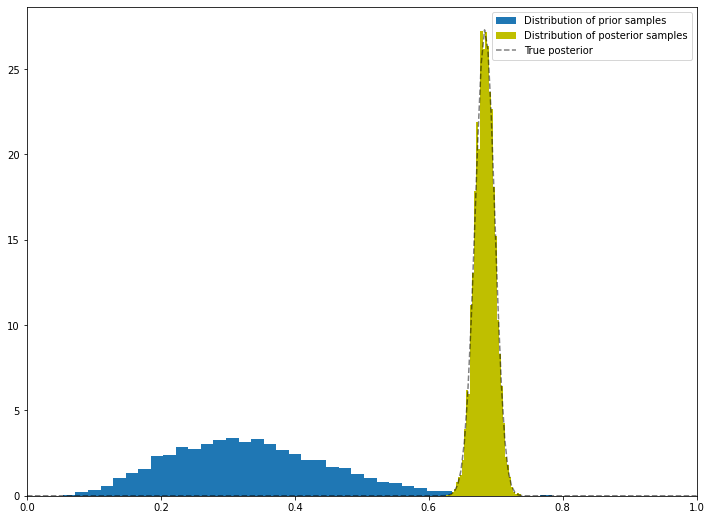

In [5]:
binom_n = 1000 
n_success = 689
beta_a  = 5
beta_b = 10
burn_in = 3000
thetas = np.linspace(0, 1, 200)
prior = st.beta(beta_a, beta_b)
post = st.beta(n_success + beta_a, binom_n - n_success + beta_b)

# plt.style.use('dark_background')
plt.figure(figsize=(12, 9))
plt.hist(prior.rvs(5000), 40, histtype='bar', density = True, linewidth=1, label='Distribution of prior samples');
plt.hist(samples[burn_in:], 40, color = 'y', histtype='bar', density = True, linewidth=1, label='Distribution of posterior samples');
plt.plot(thetas, post.pdf(thetas), color='black', linestyle='--', alpha=0.5, label='True posterior')
plt.xlim([0,1]);
plt.legend(loc='best');

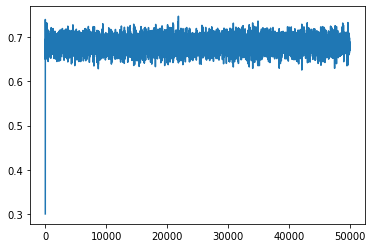

In [6]:
plt.plot(samples)